In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [22]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from imblearn.over_sampling import SMOTE

In [3]:
# Read data
file = '/content/drive/MyDrive/programiranje/C/AI piscne/professional_training_beginner/module05/Transactions.csv'
df = pd.read_csv(file)

print(df.head())

   Unnamed: 0.1  Unnamed: 0  TRANSACTION_ID          TX_DATETIME  CUSTOMER_ID  \
0             0           0               0  2023-01-01 00:00:31          596   
1             1           1               1  2023-01-01 00:02:10         4961   
2             2           2               2  2023-01-01 00:07:56            2   
3             3           3               3  2023-01-01 00:09:29         4128   
4             4           4               4  2023-01-01 00:10:34          927   

   TERMINAL_ID  TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS  \
0         3156     533.07               31             0   
1         3412     808.56              130             0   
2         1365    1442.94              476             0   
3         8737     620.65              569             0   
4         9906     490.66              634             0   

                 TX_FRAUD_SCENARIO  
0           Legitimate Transaction  
1           Legitimate Transaction  
2  Fraudulent Transaction Internet  
3   

# Data exploration

In [4]:
df.shape

(1754155, 10)

In [5]:
# Get basic statistics for numeric columns
df.describe()

,Unnamed: 0.1,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
count,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,8.770770e+05,8.770770e+05,2.504011e+03,4.996733e+03,5.396820e+02,7.903234e+06,9.097260e+01
std,5.063811e+05,5.063811e+05,5.063811e+05,1.445987e+03,2.886101e+03,1.179711e+03,4.565172e+06,5.283709e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00
25%,4.385385e+05,4.385385e+05,4.385385e+05,1.252000e+03,2.502000e+03,1.799500e+02,3.940846e+06,4.500000e+01
50%,8.770770e+05,8.770770e+05,8.770770e+05,2.506000e+03,4.994000e+03,4.217500e+02,7.902670e+06,9.100000e+01
75%,1.315616e+06,1.315616e+06,1.315616e+06,3.765000e+03,7.495000e+03,7.505950e+02,1.186566e+07,1.370000e+02
max,1.754154e+06,1.754154e+06,1.754154e+06,4.999000e+03,9.999000e+03,6.478375e+05,1.581120e+07,1.820000e+02


In [6]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'TRANSACTION_ID', 'TX_DATETIME',
       'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS',
       'TX_TIME_DAYS', 'TX_FRAUD_SCENARIO'],
      dtype='object')

In [7]:
df['Unnamed: 0.1'].equals(df['Unnamed: 0'])

True

In [8]:
df['Unnamed: 0.1'].equals(df['TRANSACTION_ID'])

True

First 3 columns are the same and they are the sameas indexes, so they can be dropped.

In [9]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD_SCENARIO
0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,Legitimate Transaction
1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,Legitimate Transaction
2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,Fraudulent Transaction Internet
3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,Legitimate Transaction
4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,Legitimate Transaction


In [10]:
# Get column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TRANSACTION_ID     int64  
 1   TX_DATETIME        object 
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    int64  
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD_SCENARIO  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 107.1+ MB


In [11]:
# Check for missing values
df.isnull().all().sum()

0

In [12]:
# checking how many unique company names are there
df.TX_FRAUD_SCENARIO.unique()

array(['Legitimate Transaction', 'Fraudulent Transaction Internet',
       'Fraudulent Transaction retailer', 'Fraudulent Transaction DAB'],
      dtype=object)

# Data Visualisation

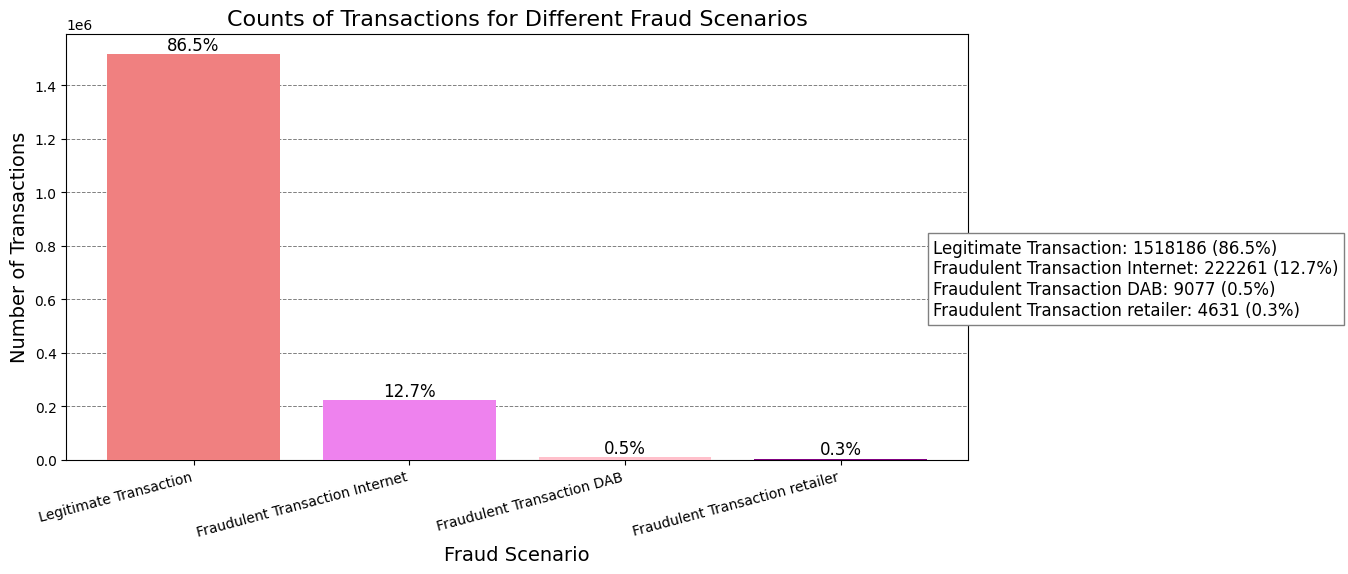

In [13]:
def plot_fraud_scenario_counts(data_frame):
    """
    Plots the counts of transactions for different fraud scenarios, adds percentage labels,
    and displays exact counts and percentages in a text box on the side.

    :param data_frame: The DataFrame containing the data.
    """
    # Ensure the 'TX_FRAUD_SCENARIO' column exists
    if 'TX_FRAUD_SCENARIO' not in data_frame.columns:
        raise ValueError("The DataFrame does not have a 'TX_FRAUD_SCENARIO' column.")

    # Count the occurrences of each fraud scenario
    fraud_counts = data_frame['TX_FRAUD_SCENARIO'].value_counts()

    # Calculate percentages
    total = fraud_counts.sum()
    fraud_percentages = (fraud_counts / total) * 100

    # Define pink shades for the bar plot using a manual approach
    colors = ['lightcoral', 'violet', 'pink', 'purple', 'hotpink', 'magenta'][:len(fraud_counts)]

    # Set up the plot
    plt.figure(figsize=(10, 6))

    # Enable grid lines behind the bars
    plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', zorder=0)

    # Create the bar plot with manual colors
    bars = plt.bar(x=fraud_counts.index, height=fraud_counts.values, color=colors, zorder=3)

    # Add percentage labels above each bar
    for bar, percentage in zip(bars, fraud_percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12, color='black')

    # Add labels and title
    plt.xlabel('Fraud Scenario', fontsize=14)
    plt.ylabel('Number of Transactions', fontsize=14)
    plt.title('Counts of Transactions for Different Fraud Scenarios', fontsize=16)

    # Rotate x-axis labels if necessary
    plt.xticks(rotation=15, ha='right')

    # Add a text box on the right with exact numbers and percentages
    textstr = '\n'.join([f'{scenario}: {count} ({percentage:.1f}%)'
                         for scenario, count, percentage in zip(fraud_counts.index, fraud_counts.values, fraud_percentages)])
    plt.gcf().text(0.95, 0.5, textstr, fontsize=12, va='center', ha='left', bbox=dict(facecolor='white', edgecolor='gray'))

    # Adjust layout to make room for the text box
    plt.subplots_adjust(right=0.75)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function to plot fraud scenario counts
plot_fraud_scenario_counts(df)


Since last 2 groups don't have too many values, all 3 Fraudulent Transaction groups can be marged into 1.

In [14]:
# checking how many unique company names are there
df.TX_FRAUD_SCENARIO.unique()

array(['Legitimate Transaction', 'Fraudulent Transaction Internet',
       'Fraudulent Transaction retailer', 'Fraudulent Transaction DAB'],
      dtype=object)

In [15]:
def replace_name(a,b):
    df.TX_FRAUD_SCENARIO.replace(a,b,inplace=True)

replace_name('Fraudulent Transaction Internet','Fraudulent Transaction')
replace_name('Fraudulent Transaction retailer','Fraudulent Transaction')
replace_name('Fraudulent Transaction DAB','Fraudulent Transaction')

df.TX_FRAUD_SCENARIO.unique()

array(['Legitimate Transaction', 'Fraudulent Transaction'], dtype=object)

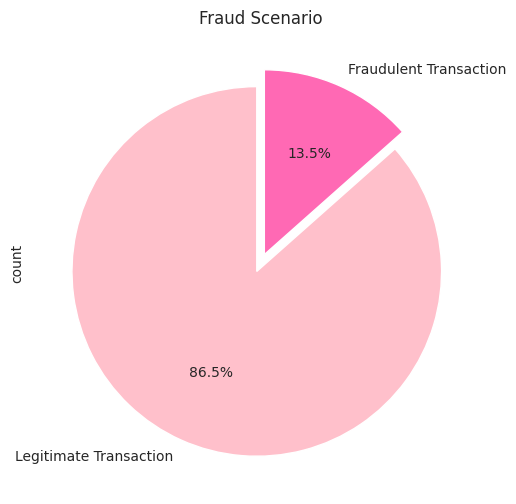

In [33]:
def plot_data_imbalance(df, target_column):
    """
    Display a pie chart to illustrate class imbalance in the target column.

    :param data_frame: The DataFrame containing the data.
    :param target_column: The name of the target column for which the imbalance should be illustrated.
    """
    sns.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    df[target_column].value_counts().plot.pie(autopct='%1.1f%%', colors=['pink', 'hotpink'], startangle=90, explode=[0.05]*len(df[target_column].value_counts()))
    plt.title('Fraud Scenario')
    plt.show()


# Call the function to display class imbalance in the 'TX_FRAUD_SCENARIO' column
plot_data_imbalance(df, 'TX_FRAUD_SCENARIO')

In [17]:
df.TX_DATETIME.head()

,TX_DATETIME
0,2023-01-01 00:00:31
1,2023-01-01 00:02:10
2,2023-01-01 00:07:56
3,2023-01-01 00:09:29
4,2023-01-01 00:10:34


After investigating datatime column, I concluded that it is in format YYYY-DD-MM hh:mm:ss. It is type object, so it needs to be converted into datatime.

In [18]:
# Convert 'TX_DATETIME' column to datetime
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'], format='%Y-%m-%d %H:%M:%S')

# Extract the month and create a new 'Month' column
df['Month'] = df['TX_DATETIME'].dt.strftime('%B')

# Display the DataFrame
print(df)

         TRANSACTION_ID         TX_DATETIME  CUSTOMER_ID  TERMINAL_ID  \
0                     0 2023-01-01 00:00:31          596         3156   
1                     1 2023-01-01 00:02:10         4961         3412   
2                     2 2023-01-01 00:07:56            2         1365   
3                     3 2023-01-01 00:09:29         4128         8737   
4                     4 2023-01-01 00:10:34          927         9906   
...                 ...                 ...          ...          ...   
1754150         1754150 2023-07-02 23:56:36          161          655   
1754151         1754151 2023-07-02 23:57:38         4342         6181   
1754152         1754152 2023-07-02 23:58:21          618         1502   
1754153         1754153 2023-07-02 23:59:52         4056         3067   
1754154         1754154 2023-07-02 23:59:57         3542         9849   

         TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS       TX_FRAUD_SCENARIO  \
0           533.07               31           

In [19]:
df.Month.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1754155 entries, 0 to 1754154
Series name: Month
Non-Null Count    Dtype 
--------------    ----- 
1754155 non-null  object
dtypes: object(1)
memory usage: 13.4+ MB


In [20]:
df.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July'],
      dtype=object)

After checking for possible month values, it is visabale that last month is July, so there is no need to put on chart months after that.

<ipython-input-21-fa1b4d793273>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_fraud_counts = df.groupby(['Month', 'TX_FRAUD_SCENARIO']).size().reset_index(name='Count')


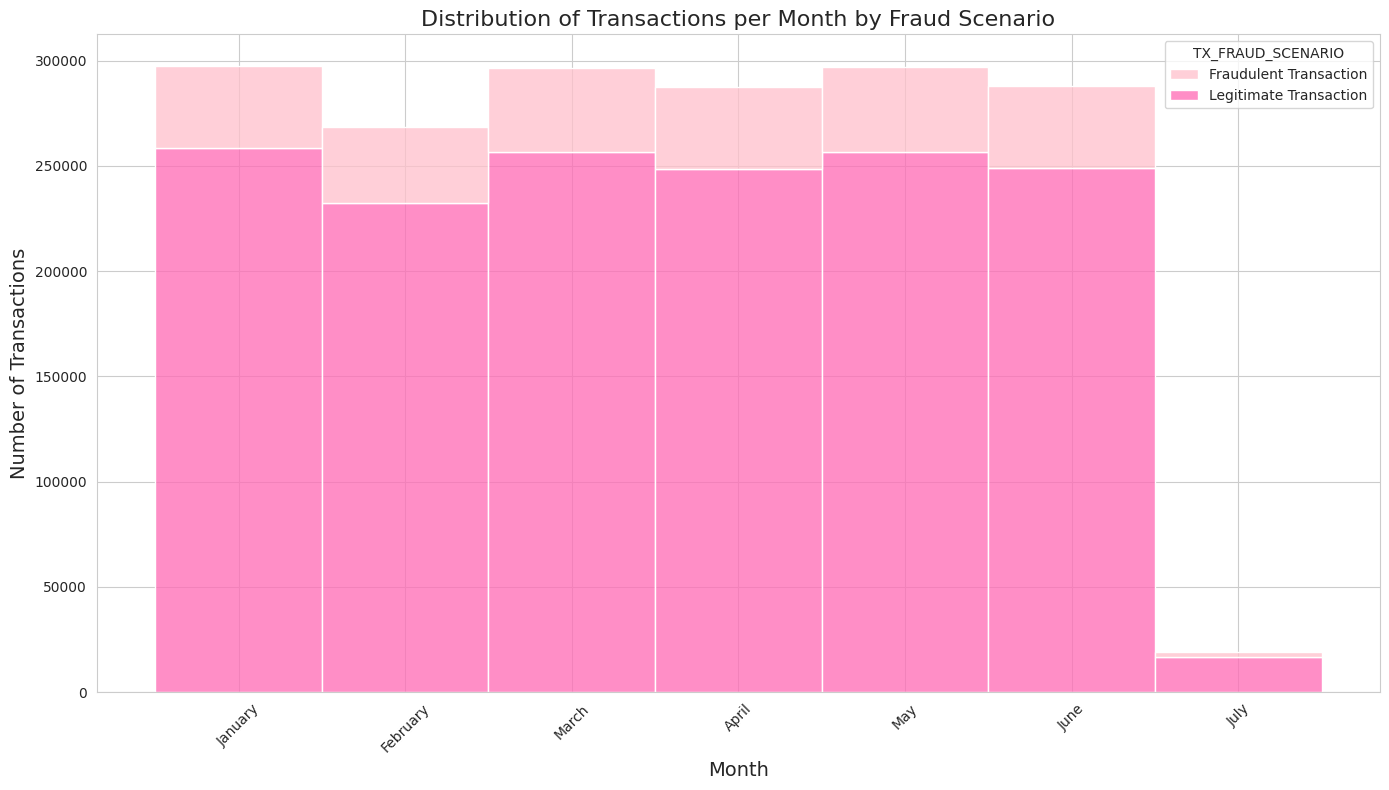

In [21]:
def visualize_monthly_transactions(df):
    """
    Visualizes the distribution of transactions per month and their fraud scenario using a stacked bar plot.

    :param df: DataFrame containing transaction data.
    """
    # Ensure 'Month' and 'TX_FRAUD_SCENARIO' columns exist
    if 'Month' not in df.columns or 'TX_FRAUD_SCENARIO' not in df.columns:
        raise ValueError("The DataFrame must contain 'Month' and 'TX_FRAUD_SCENARIO' columns.")

    # Define the order for months
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July']

    # Convert 'Month' to a categorical type with a defined order
    df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

    # Group by 'Month' and 'TX_FRAUD_SCENARIO' and count occurrences
    monthly_fraud_counts = df.groupby(['Month', 'TX_FRAUD_SCENARIO']).size().reset_index(name='Count')

    # Define pink shades for the bar plot
    unique_scenarios = monthly_fraud_counts['TX_FRAUD_SCENARIO'].unique()
    pink_palette = sns.color_palette(['pink', 'hotpink'][:len(unique_scenarios)])

    # Set up the plot
    plt.figure(figsize=(14, 8))
    sns.histplot(
        data=monthly_fraud_counts,
        x='Month',
        hue='TX_FRAUD_SCENARIO',
        weights='Count',
        palette=pink_palette,
        multiple='stack',
        discrete=True
    )

    # Add labels and title
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Transactions', fontsize=14)
    plt.title('Distribution of Transactions per Month by Fraud Scenario', fontsize=16)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function to visualize monthly transactions and fraud scenarios
visualize_monthly_transactions(df)


# Balansing the data

In [24]:
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD_SCENARIO,Month
0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,Legitimate Transaction,January
1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,Legitimate Transaction,January
2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,Fraudulent Transaction,January
3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,Legitimate Transaction,January
4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,Legitimate Transaction,January


In [26]:
def balance_data_with_smote(df, target_column):
    """
    Balances the dataset using SMOTE to oversample the minority class.

    :param df: The DataFrame containing the data.
    :param target_column: The name of the target column for which the balancing is performed.
    :return: A balanced DataFrame.
    """
    # Drop any non-numeric columns or handle them appropriately
    df_numeric = df.select_dtypes(include=['number']).copy()

    # Ensure the target column is included
    df_numeric[target_column] = df[target_column]

    # Separate the features (X) and the target variable (y)
    X = df_numeric.drop(columns=[target_column])
    y = df_numeric[target_column]

    # Apply SMOTE to create a balanced dataset
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Combine the resampled X and y into a new balanced DataFrame
    balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=[target_column])], axis=1)

    return balanced_df

# Example usage: Balance the dataset using SMOTE based on the 'TX_FRAUD_SCENARIO' column
balanced_df = balance_data_with_smote(df, 'TX_FRAUD_SCENARIO')

# Checking the class distribution before balancing
print(df['TX_FRAUD_SCENARIO'].value_counts())

# Checking the class distribution after balancing
print(balanced_df['TX_FRAUD_SCENARIO'].value_counts())


TX_FRAUD_SCENARIO
Legitimate Transaction    1518186
Fraudulent Transaction     235969
Name: count, dtype: int64
TX_FRAUD_SCENARIO
Legitimate Transaction    1518186
Fraudulent Transaction    1518186
Name: count, dtype: int64


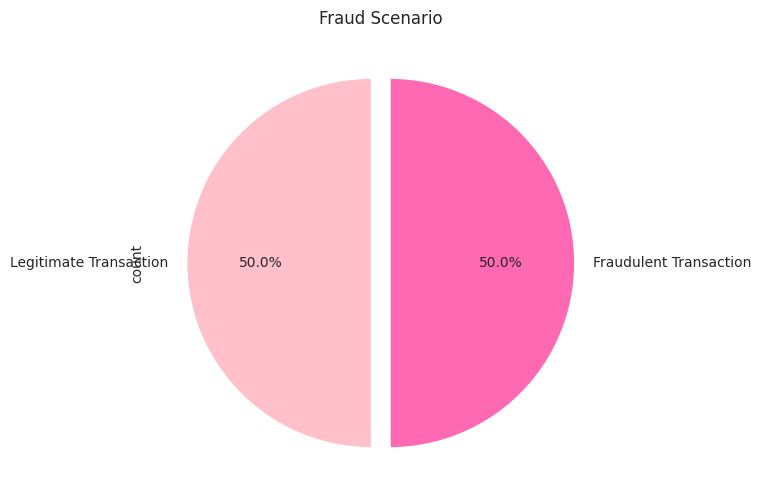

In [34]:
# Call the function to display the class imbalance in the 'TX_FRAUD_SCENARIO' column
plot_data_imbalance(balanced_df, 'TX_FRAUD_SCENARIO')

# Logistic Regression Model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score

def train_logistic_regression(df, target_column):
    """
    Trains a Logistic Regression model on the provided DataFrame.

    :param df: The balanced DataFrame containing features and the target column.
    :param target_column: The name of the target column.
    :return: The trained Logistic Regression model and the evaluation metrics.
    """
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Encode the target column using LabelEncoder
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Identify categorical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns

    # Create a preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first'), categorical_cols),
            ('num', MinMaxScaler(), X.select_dtypes(exclude=['object', 'category']).columns)
        ]
    )

    # Build the full pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42))
    ])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the logistic regression model
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("R2 Score:", r2)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)

    return pipeline

# Use the balanced data to train and evaluate the Logistic Regression model
logistic_model = train_logistic_regression(balanced_df, 'TX_FRAUD_SCENARIO')


Accuracy: 0.9443826931785435
R2 Score: 0.7775307707542065
Confusion Matrix:
 [[295152   8457]
 [ 25318 278348]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    303609
           1       0.97      0.92      0.94    303666

    accuracy                           0.94    607275
   macro avg       0.95      0.94      0.94    607275
weighted avg       0.95      0.94      0.94    607275



# K-Nearest Neighbors accuracy

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

def train_simple_knn_classifier(df, target_column):
    """
    Trains and evaluates a simple K-Nearest Neighbors (KNN) classifier.

    :param df: The balanced DataFrame containing features and the target column.
    :param target_column: The name of the target column.
    :return: The trained KNN model and the accuracy score.
    """
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Encode the target column using LabelEncoder
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("KNN Classifier Accuracy:", accuracy)

    return knn_classifier

# Use the balanced data to train and evaluate the simple KNN classifier
knn_model = train_simple_knn_classifier(balanced_df, 'TX_FRAUD_SCENARIO')


KNN Classifier Accuracy: 0.9257700382857849


# Decision Tree accuracy

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

def train_decision_tree_classifier(df, target_column):
    """
    Trains and evaluates a Decision Tree classifier.

    :param df: The balanced DataFrame containing features and the target column.
    :param target_column: The name of the target column.
    :return: The trained Decision Tree model and the accuracy score.
    """
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Encode the target column using LabelEncoder
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Decision Tree classifier
    tree_classifier = DecisionTreeClassifier(random_state=42)
    tree_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = tree_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Decision Tree Classifier Accuracy:", accuracy)

    return tree_classifier

# Use the balanced data to train and evaluate the Decision Tree classifier
decision_tree_model = train_decision_tree_classifier(balanced_df, 'TX_FRAUD_SCENARIO')


Decision Tree Classifier Accuracy: 0.966944135688115


# Random Forest accuracy

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

def train_random_forest_classifier(df, target_column):
    """
    Trains and evaluates a Random Forest classifier.

    :param df: The balanced DataFrame containing features and the target column.
    :param target_column: The name of the target column.
    :return: The trained Random Forest model and the accuracy score.
    """
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Encode the target column using LabelEncoder
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Random Forest Classifier Accuracy:", accuracy)

    return rf_classifier

# Use the balanced data to train and evaluate the Random Forest classifier
random_forest_model = train_random_forest_classifier(balanced_df, 'TX_FRAUD_SCENARIO')


Random Forest Classifier Accuracy: 0.9819192293442015


# Gradient Boosting accuracy

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

def train_gradient_boosting_classifier(df, target_column):
    """
    Trains and evaluates a Gradient Boosting classifier.

    :param df: The balanced DataFrame containing features and the target column.
    :param target_column: The name of the target column.
    :return: The trained Gradient Boosting model and the accuracy score.
    """
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Encode the target column using LabelEncoder
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Gradient Boosting classifier
    gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
    gb_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gb_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Gradient Boosting Classifier Accuracy:", accuracy)

    return gb_classifier

# Use the balanced data to train and evaluate the Gradient Boosting classifier
gradient_boosting_model = train_gradient_boosting_classifier(balanced_df, 'TX_FRAUD_SCENARIO')


Gradient Boosting Classifier Accuracy: 0.9803136964307768


# XGBoost

In [46]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def apply_xgboost(df, target_column):
    """
    Applies XGBoost to the given DataFrame and evaluates its performance.

    :param df: The DataFrame containing the data.
    :param target_column: The name of the target column.
    :return: The accuracy of the model.
    """
    # Separate features and target variable
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Encode the target variable to numerical values
    y = y.map({'Fraudulent Transaction': 1, 'Legitimate Transaction': 0})

    # Encode categorical features if any
    X = pd.get_dummies(X, drop_first=True)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize XGBoost classifier
    xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

    # Fit the model to the training data
    xgb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Apply XGBoost to the balanced dataset
accuracy = apply_xgboost(balanced_df, 'TX_FRAUD_SCENARIO')
print(f"Accuracy of XGBoost model: {accuracy:.4f}")


Accuracy of XGBoost model: 0.9799
